# Description

The used car sales service Rusty Bargain is developing an app to attract new customers. With this app, you can quickly find out your car's market value. You have access to the history: technical specifications, trim levels, and prices. You have to create a model that determines the market value.
Rusty Bargain is interested in:
- the quality of the prediction;
- the speed of the prediction;
- the time required for training.

## Data visualization

In [234]:
# Library are imported

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from IPython.display import display
from sklearn.model_selection import cross_val_score, KFold

In [235]:
# Data is displayed

df = pd.read_csv('car_data.csv')
display(df)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [237]:
# Column names are rewritten to be simpler

df.columns = df.columns.str.lower()
print(df.columns)

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'mileage', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')


In [239]:
# Relevant information is displayed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

In [241]:
# Duplicates and their number are shown

display(df[df.duplicated()])
print(df.duplicated().sum())

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
14266,21/03/2016 19:06,5999,small,2009,manual,80,polo,125000,5,petrol,volkswagen,no,21/03/2016 00:00,0,65529,05/04/2016 20:47
27568,23/03/2016 10:38,12200,bus,2011,manual,125,zafira,40000,10,gasoline,opel,no,23/03/2016 00:00,0,26629,05/04/2016 07:44
31599,03/04/2016 20:41,4950,wagon,2003,auto,170,e_klasse,150000,4,gasoline,mercedes_benz,no,03/04/2016 00:00,0,48432,05/04/2016 21:17
33138,07/03/2016 20:45,10900,convertible,2005,auto,163,clk,125000,5,petrol,mercedes_benz,no,07/03/2016 00:00,0,61200,21/03/2016 03:45
43656,13/03/2016 20:48,4200,sedan,2003,manual,105,golf,150000,10,gasoline,volkswagen,no,13/03/2016 00:00,0,14482,13/03/2016 20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349709,03/04/2016 20:52,700,small,1999,manual,60,ibiza,150000,12,petrol,seat,yes,03/04/2016 00:00,0,6268,05/04/2016 21:47
351555,26/03/2016 16:54,3150,bus,2003,manual,86,transit,150000,11,gasoline,ford,no,26/03/2016 00:00,0,96148,02/04/2016 07:47
352384,15/03/2016 21:54,5900,wagon,2006,manual,129,3er,150000,12,petrol,bmw,no,15/03/2016 00:00,0,92526,20/03/2016 21:17
353057,05/03/2016 14:16,9500,small,2013,manual,105,ibiza,40000,5,petrol,seat,no,04/03/2016 00:00,0,61381,05/04/2016 19:18


262


In [243]:
# Metrics for numerical variables are shown

df.describe()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


**Observations**

1. The 262 duplicate values are normal for the type of data in this set, they are cars that can be sold on the same date, the same model and with the same characteristics, so 262 duplicate data out of 354,369, means just under 0.075% of the data, which is reasonable for this type of information.
2. The 5 columns with null values can be changed to "unknown" since although it would not significantly affect the analysis, partly because they are variables of type "object".
3. There are 10,772 vehicles with a price of '0' which makes no sense, it can mean several things such as that the sale did not go through, that it was too old to be sold, among others. It does not make much sense to do the analysis with these values, therefore, they will be eliminated from processing due to their irrelevance.
4. The same thing happens with the variable 'power', according to efficiency reports the most powerful car in the world has 2332 CV, beyond this it would not make sense and neither would '0'.
5. Another characteristic with an irrelevant value is 'registrationyear' with a value of '1000' or '9999' so values ​​in meaningless ranges will be discarded in the analysis.

### Data preprocessing

In [247]:
# Missing values are replaced

df.fillna({'fueltype': 'unknown'}, inplace=True)
df.fillna({'notrepaired': 'unknown'}, inplace=True)
df.fillna({'vehicletype': 'unknown'}, inplace=True)
df.fillna({'gearbox': 'unknown'}, inplace=True)
df.fillna({'model': 'unknown'}, inplace=True)

In [248]:
# Relevant information is leaked

df = df[(df['price'] > 0) & (df['power'] > 0) & (df['power'] <= 2300) & (df['registrationyear'] >= 1900 ) & (df['registrationyear'] <= 2024 )]
display(df)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
1,24/03/2016 10:58,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354361,09/03/2016 13:37,5250,unknown,2016,auto,150,159,150000,12,unknown,alfa_romeo,no,09/03/2016 00:00,0,51371,13/03/2016 01:44
354362,19/03/2016 19:53,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,19/03/2016 00:00,0,96465,19/03/2016 20:44
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


## Model training

In [250]:
# Variables that do not contribute are removed 

df.drop(['datecrawled', 'datecreated', 'lastseen', 'numberofpictures'], axis=1, inplace=True)

In [251]:
# Data is divided

X = df.drop('price', axis = 1)
y = df['price']

# Coding for categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_X = encoder.fit_transform(X[categorical_cols])

# Scaling for numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X[numeric_cols])

# Concatenate processed features
processed_X = np.hstack((scaled_X, encoded_X))

In [252]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(processed_X, y, test_size = 0.3, random_state = 12345)

In [253]:
# Linear Regression Model
start_time_lr = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
training_time_lr = time.time() - start_time_lr

In [254]:
# LGBM Regressor model
# Model configuration
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 100,
}

start_time_lgbm = time.time()
lgb_model = lgb.LGBMRegressor(**params)
lgb_model.fit(X_train, y_train)
training_time_lgbm = time.time() - start_time_lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 214971, number of used features: 301
[LightGBM] [Info] Start training from score 4802.023050


In [255]:
# Cat Boost Regressor model
# Model configuration
params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 10,
    'verbose': False
}

start_time_cb = time.time()
cat_model = CatBoostRegressor(**params)
cat_model.fit(X_train, y_train)
training_time_cb = time.time() - start_time_cb

In [256]:
# XGB Regressor model
# Model configuration
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 100,
}

start_time_xgb = time.time()
xgb_model = XGBRegressor(**params)
xgb_model.fit(X_train, y_train)
training_time_xgb = time.time() - start_time_xgb

## Model analysis

In [258]:
# Regresión lineal
# Prediction and evaluation
y_pred_lr = lr_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(rmse_lr)

print(f"Model: Linear Regression")
print(f"Training time: {training_time_lr:.2f} seconds")
print(f"RECM: {rmse_lr:.2f}")

Model: Linear Regression
Training time: 3.61 seconds
RECM: 2701.29


In [259]:
# Cross Validation Settings (5 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=12345)
# Evaluating models with cross-validation
results = {}
start_time = time.time()
scores = cross_val_score(lr_model, X_test, y_test, cv=kf, scoring='neg_root_mean_squared_error')
training_time = time.time() - start_time
rmse_scores = -scores  # Convert to positive RMSE
results['Linear Regression'] = {
    "Mean RMSE": np.mean(rmse_scores),
    "Std Dev RMSE": np.std(rmse_scores),
    "Training Time (s)": training_time
}

In [260]:
# Decision Tree
max_depth_values = [5, 10, 20, 30]

for depth in max_depth_values:
    start_time = time.time()
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    dt_model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Prediction and evaluation
    y_pred_dt = dt_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred_dt)
    rmse = np.sqrt(rmse)

    print(f"\nModel: Decision Tree (max_depth={depth})")
    print(f"Training time: {training_time:.2f} seconds")
    print(f"RECM: {rmse:.2f}")


Model: Decision Tree (max_depth=5)
Training time: 2.97 seconds
RECM: 2493.03

Model: Decision Tree (max_depth=10)
Training time: 4.47 seconds
RECM: 2006.92

Model: Decision Tree (max_depth=20)
Training time: 5.85 seconds
RECM: 1980.00

Model: Decision Tree (max_depth=30)
Training time: 6.81 seconds
RECM: 2060.87


In [261]:
# Evaluating models with cross-validation
results = {}
start_time = time.time()
scores = cross_val_score(dt_model, X_test, y_test, cv=kf, scoring='neg_root_mean_squared_error')
training_time = time.time() - start_time
rmse_scores = -scores  # # Convert to positive RMSE
results['Desicion Tree'] = {
    "Mean RMSE": np.mean(rmse_scores),
    "Std Dev RMSE": np.std(rmse_scores),
    "Training Time (s)": training_time
}

In [262]:
# Random Forest Model

# Hyperparameters to tune
n_estimators_values = [50, 75, 100]
max_depth_values=[5, 10, 15]

for estimators in n_estimators_values:
    for max_depth in max_depth_values:
        start_time = time.time()
        rf_model = RandomForestRegressor(n_estimators=estimators, max_depth=max_depth, random_state=12345)
        rf_model.fit(X_train, y_train)
        training_time = time.time() - start_time

        # Prediction and evaluation
        y_pred = rf_model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(rmse)

        print(f"\nModel: Random Forest (n_estimators={estimators} y max_depth={max_depth})")
        print(f"Trainig time: {training_time:.2f} seconds")
        print(f"RECM: {rmse:.2f}")
    del rf_model, rmse, y_pred


Model: Random Forest (n_estimators=50 y max_depth=5)
Trainig time: 93.83 seconds
RECM: 2457.62

Model: Random Forest (n_estimators=50 y max_depth=10)
Trainig time: 136.05 seconds
RECM: 1916.74

Model: Random Forest (n_estimators=50 y max_depth=15)
Trainig time: 160.17 seconds
RECM: 1700.81

Model: Random Forest (n_estimators=75 y max_depth=5)
Trainig time: 137.67 seconds
RECM: 2456.85

Model: Random Forest (n_estimators=75 y max_depth=10)
Trainig time: 205.44 seconds
RECM: 1914.62

Model: Random Forest (n_estimators=75 y max_depth=15)
Trainig time: 245.01 seconds
RECM: 1697.71

Model: Random Forest (n_estimators=100 y max_depth=5)
Trainig time: 184.61 seconds
RECM: 2456.91

Model: Random Forest (n_estimators=100 y max_depth=10)
Trainig time: 281.24 seconds
RECM: 1913.69

Model: Random Forest (n_estimators=100 y max_depth=15)
Trainig time: 333.37 seconds
RECM: 1696.80


In [263]:
rf_model = RandomForestRegressor(n_estimators=estimators, max_depth=max_depth, random_state=12345)
rf_model.fit(X_train, y_train)
# Evaluating models with cross-validation
start_time = time.time()
scores = cross_val_score(rf_model, X_test, y_test, cv=kf, scoring='neg_root_mean_squared_error')
training_time = time.time() - start_time
rmse_scores = -scores  # # Convert to positive RMSE
results['Random Forest'] = {
    "Mean RMSE": np.mean(rmse_scores),
    "Std Dev RMSE": np.std(rmse_scores),
    "Training Time (s)": training_time
}

In [264]:
# LightGBM model

# Prediction and evaluation
y_pred_lgbm = lgb_model.predict(X_test)
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(rmse_lgbm)

print("\nModel: LightGBM")
print(f"Training time: {training_time_lgbm:.2f} seconds")
print(f"RECM: {rmse_lgbm:.2f}")


Model: LightGBM
Training time: 0.70 seconds
RECM: 1714.89


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [265]:
# Evaluating models with cross-validation
start_time = time.time()
scores = cross_val_score(lgb_model, X_test, y_test, cv=kf, scoring='neg_root_mean_squared_error')
training_time = time.time() - start_time
rmse_scores = -scores  # # Convert to positive RMSE
results['LightGBM'] = {
    "Mean RMSE": np.mean(rmse_scores),
    "Std Dev RMSE": np.std(rmse_scores),
    "Training Time (s)": training_time
}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 82917, number of used features: 280
[LightGBM] [Info] Start training from score 4824.511174


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 283
[LightGBM] [Info] Start training from score 4829.833124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 281
[LightGBM] [Info] Start training from score 4832.524277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 281
[LightGBM] [Info] Start training from score 4828.472274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 282
[LightGBM] [Info] Start training from score 4831.727188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 280
[LightGBM] [Info] Start training from score 4824.077329


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 281
[LightGBM] [Info] Start training from score 4833.234002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 281
[LightGBM] [Info] Start training from score 4830.706011


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 283
[LightGBM] [Info] Start training from score 4833.181661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 82918, number of used features: 281
[LightGBM] [Info] Start training from score 4825.395945


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [266]:
# Cat Boost Regressor model

# Prediction and evaluation
y_pred_cb = cat_model.predict(X_test)
rmse_cb = mean_squared_error(y_test, y_pred_cb)
rmse_cb = np.sqrt(rmse_cb)

print("\nModel: CatBoost")
print(f"Training time: {training_time_cb:.2f} seconds")
print(f"RECM: {rmse_cb:.2f}")


Model: CatBoost
Training time: 20.60 seconds
RECM: 1728.26


In [267]:
# Evaluating models with cross-validation
start_time = time.time()
scores = cross_val_score(cat_model, X_test, y_test, cv=kf, scoring='neg_root_mean_squared_error')
training_time = time.time() - start_time
rmse_scores = -scores  # # Convert to positive RMSE
results['CatBoost'] = {
    "Mean RMSE": np.mean(rmse_scores),
    "Std Dev RMSE": np.std(rmse_scores),
    "Training Time (s)": training_time
}

In [268]:
# XGB Regressor model

# Prediction and evaluation
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(rmse_xgb)

print("\nModel: XGBoost")
print(f"Training time: {training_time_xgb:.2f} seconds")
print(f"RECM: {rmse_xgb:.2f}")


Model: XGBoost
Training time: 2.74 seconds
RECM: 1601.22


In [269]:
# Evaluating models with cross-validation
start_time = time.time()
scores = cross_val_score(xgb_model, X_test, y_test, cv=kf, scoring='neg_root_mean_squared_error')
training_time = time.time() - start_time
rmse_scores = -scores  # # Convert to positive RMSE
results['XGBoost'] = {
    "Mean RMSE": np.mean(rmse_scores),
    "Std Dev RMSE": np.std(rmse_scores),
    "Training Time (s)": training_time
}

In [270]:
# Show results

for model, metrics in results.items():
    print(f"{model}:")
    print(f"  Mean RMSE: {metrics['Mean RMSE']:.2f}")
    print(f"  Std Dev RMSE: {metrics['Std Dev RMSE']:.2f}")
    print(f"  Training Time: {metrics['Training Time (s)']:.2f} sec\n")

Desicion Tree:
  Mean RMSE: 2255.52
  Std Dev RMSE: 40.40
  Training Time: 21.79 sec

Random Forest:
  Mean RMSE: 1755.62
  Std Dev RMSE: 23.77
  Training Time: 1067.34 sec

LightGBM:
  Mean RMSE: 1726.97
  Std Dev RMSE: 26.25
  Training Time: 3.69 sec

CatBoost:
  Mean RMSE: 1749.73
  Std Dev RMSE: 23.47
  Training Time: 107.06 sec

XGBoost:
  Mean RMSE: 1657.09
  Std Dev RMSE: 27.19
  Training Time: 14.22 sec



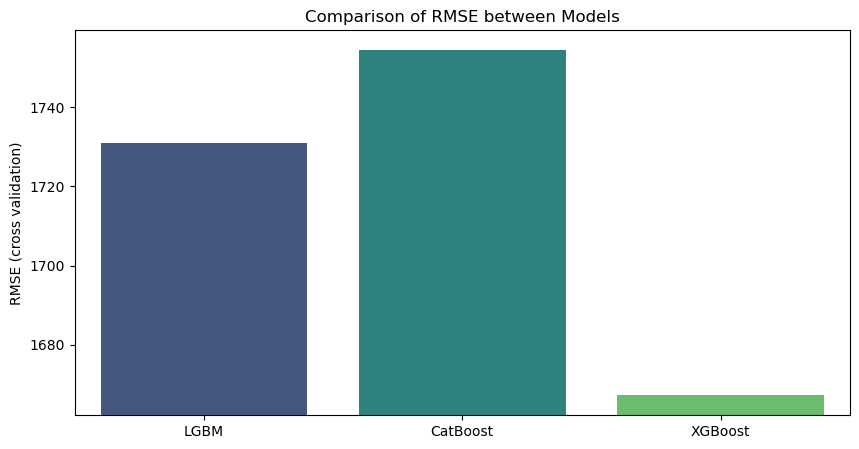

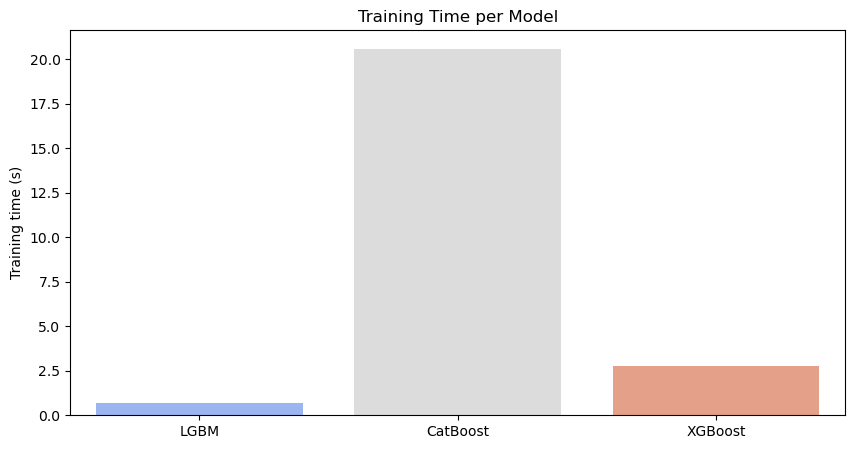

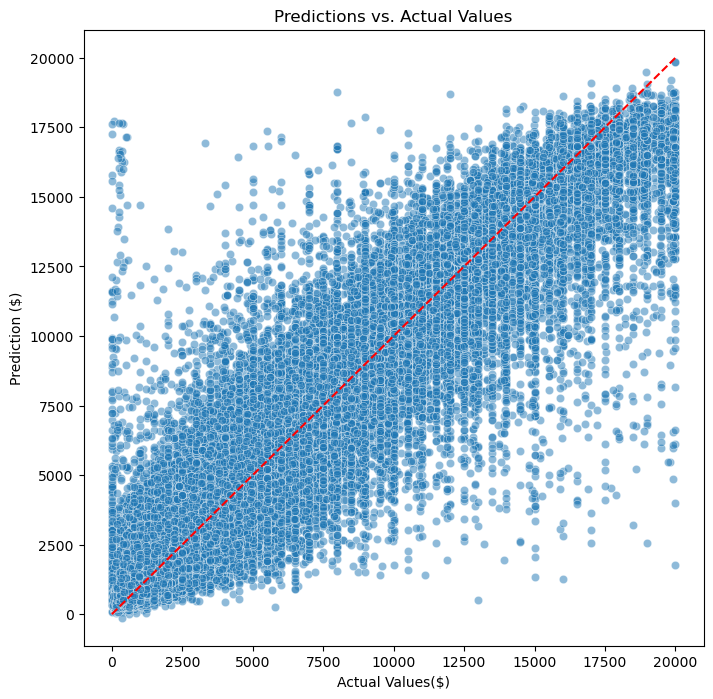

In [302]:
# We save the best RMSE obtained
models = ['LGBM', 'CatBoost', 'XGBoost']
rmse_scores = [
    1730.85,
    1754.36,
    1667.21
]

train_times = [training_time_lgbm, training_time_cb, training_time_xgb]

# RMSE Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=rmse_scores, hue=models, legend=False, palette='viridis')
plt.ylabel("RMSE (cross validation)")
plt.title("Comparison of RMSE between Models")
plt.ylim(min(rmse_scores) - 5, max(rmse_scores) + 5)
plt.show()


# Comparison of training times
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=train_times, hue=models, legend=False, palette='coolwarm')
plt.ylabel("Training time (s)")
plt.title("Training Time per Model")
plt.show()


# Scatter Plot: Predictions vs. Actual Values
best_model = xgb_model
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Ideal line
plt.xlabel("Actual Values($)")
plt.ylabel("Prediction ($)")
plt.title("Predictions vs. Actual Values")
plt.show()

## Conclusion

1. The XGBM Regressor model showed the lowest error.
2. The models trained by Decision Tree showed the lowest error with max_depth = 20.
3. The models trained by Random Forest showed improvement with increasing 'max_depth' and 'n_estimators'; however, the error decreased very little after n_estimators = 75 and max_depth = 15, which showed the second lowest error.
3. Numerical variables were scaled, and categorical variables were coded.
4. The data showed some irregularities that were successfully corrected at the time of analysis.